# Predictive Analytics & Machine Learning

### Goal:  Predict Annual salary of a customer based on the available data.


#### Tasks Performed: 
- Data Cleaning, 
- Feature Extraction, 
- Predictive Modeling
#### Algorithms: 
- Linear Regression, 
- Decision Tree

In [20]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [3]:
data=data[['customer_id','gender','age','txn_description','balance','amount']]
data.head()

,customer_id,gender,age,txn_description,balance,amount
0,CUS-2487424745,F,26,POS,35.39,16.25
1,CUS-2487424745,F,26,SALES-POS,21.20,14.19
2,CUS-2142601169,M,38,POS,5.71,6.42
3,CUS-1614226872,F,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,F,26,SALES-POS,17.95,3.25


In [4]:
df=pd.get_dummies(data['gender'])
data=pd.concat([data,df], axis=1)

In [5]:
data=data.drop(['gender'],axis=1)

In [6]:
data['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

### Feature Extraction:

In [7]:
data=data[data["txn_description"]=="PAY/SALARY"]
data.head()

,customer_id,age,txn_description,balance,amount,F,M
50,CUS-1462656821,23,PAY/SALARY,8342.11,3903.95,0,1
61,CUS-2500783281,23,PAY/SALARY,2040.58,1626.48,1,0
64,CUS-326006476,22,PAY/SALARY,3158.51,983.36,0,1
68,CUS-1433879684,24,PAY/SALARY,2517.66,1408.08,0,1
70,CUS-4123612273,43,PAY/SALARY,2271.79,1068.04,1,0


In [8]:
data = data.reset_index(drop=True)
data.head()

,customer_id,age,txn_description,balance,amount,F,M
0,CUS-1462656821,23,PAY/SALARY,8342.11,3903.95,0,1
1,CUS-2500783281,23,PAY/SALARY,2040.58,1626.48,1,0
2,CUS-326006476,22,PAY/SALARY,3158.51,983.36,0,1
3,CUS-1433879684,24,PAY/SALARY,2517.66,1408.08,0,1
4,CUS-4123612273,43,PAY/SALARY,2271.79,1068.04,1,0


In [9]:
df2=data.groupby(['customer_id','age','F','M'], as_index=False).agg({"amount": "sum"})

In [10]:
df2.rename(columns = {'amount':'Annual_Salary'}, inplace = True)
df2.head()

,customer_id,age,F,M,Annual_Salary
0,CUS-1005756958,53,1,0,12616.11
1,CUS-1117979751,21,0,1,25050.55
2,CUS-1140341822,28,0,1,11499.06
3,CUS-1147642491,34,1,0,22248.07
4,CUS-1196156254,34,1,0,27326.11


__Influnce of attributes on each other__:

In [11]:
df2.corr()

,age,F,M,Annual_Salary
age,1.000000,-0.012067,0.012067,-0.036504
F,-0.012067,1.000000,-1.000000,-0.102226
M,0.012067,-1.000000,1.000000,0.102226
Annual_Salary,-0.036504,-0.102226,0.102226,1.000000


In [14]:
X=df2['age']
y=df2['Annual_Salary']

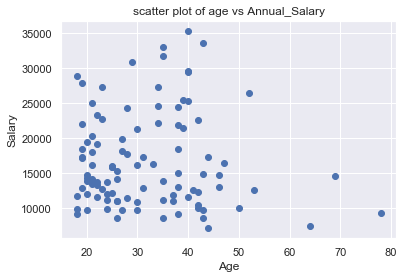

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

plt.scatter(X, y)
plt.title('scatter plot of age vs Annual_Salary')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)

### Linear Regression Model:

In [21]:
# Creates a linear regression from the data points
m,b = np.polyfit(train_x, train_y, 1)

In [22]:
# This is a simple y = mx + b line function
def f(x):
    return m*x + b

In [23]:
predicted=f(test_x)

In [24]:
from sklearn.metrics import r2_score
r2_score(test_y,predicted)

-0.002239472357304484

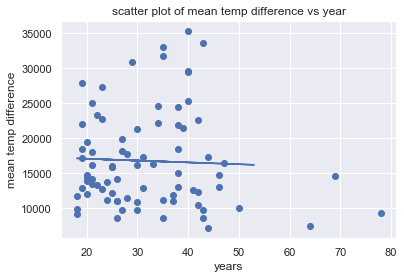

In [25]:
# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(train_x, train_y)

plt.plot(test_x, predicted)

plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

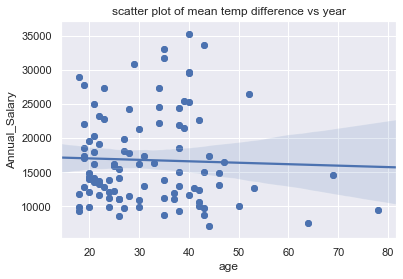

In [27]:
### Seaborn Regression
plt.scatter(X, y)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)

#Regression model
sns.regplot(X, y)
plt.show()

### Decision Tree Model:

In [29]:
X=df2[['age','F','M']]
y=df2['Annual_Salary']

train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42)


In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
regressor = DecisionTreeRegressor(random_state=0)

In [33]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(train_x, train_y)
regr_2.fit(train_x, train_y)

# Predict
y_1 = regr_1.predict(test_x)
y_2 = regr_2.predict(test_x)

In [44]:
## Depth=2
regr_1.score(train_x,train_y)

0.13416318369228275

In [43]:
## Depth = 5
regr_2.score(train_x,train_y)

0.512479038072489

### __Goals achieved:__
- New feature is extracted from the given dataset.
- Annual salary of customer is Predicted using extracted feature. 
- Optimized the result of predictive model by Hyper-parameter tuning.
 

### Author:
Pranav Khiste<br>
Information Systems<br>
Northeastern University<br>